In [1]:
import pandas as pd
data_url = 'https://raw.githubusercontent.com/PacktWorkshops/The-Deep-Learning-Workshop/master/Chapter02/Datasets/iris.csv'
df = pd.read_csv(data_url)
print(df)

     petallength  petalwidth  sepallength  sepalwidth  species
0            5.1         3.5          1.4         0.2        0
1            4.9         3.0          1.4         0.2        0
2            4.7         3.2          1.3         0.2        0
3            4.6         3.1          1.5         0.2        0
4            5.0         3.6          1.4         0.2        0
..           ...         ...          ...         ...      ...
145          6.7         3.0          5.2         2.3        2
146          6.3         2.5          5.0         1.9        2
147          6.5         3.0          5.2         2.0        2
148          6.2         3.4          5.4         2.3        2
149          5.9         3.0          5.1         1.8        2

[150 rows x 5 columns]


Text(0.5, 0, 'Sepal Length')

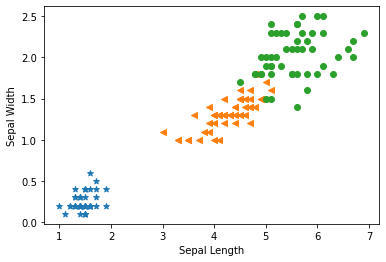

In [2]:
# visualize the data using a scatter plot
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

plt.scatter(df[df['species'] == 0]['sepallength'],
           df[df['species'] == 0]['sepalwidth'], marker='*')
plt.scatter(df[df['species'] == 1]['sepallength'],
           df[df['species'] == 1]['sepalwidth'], marker='<')
plt.scatter(df[df['species'] == 2]['sepallength'],
           df[df['species'] == 2]['sepalwidth'], marker='o')

ax.set_ylabel('Sepal Width')
ax.set_xlabel('Sepal Length')

In [3]:
x = df[['petallength', 'petalwidth', 'sepallength', 'sepalwidth']].values
y = df['species'].values

In [4]:
from pandas import get_dummies
y = get_dummies(y)
y = y.values

In [5]:
import tensorflow as tf
x = tf.Variable(x, dtype=tf.float32)
tf.print(x)

[[5.1 3.5 1.4 0.2]
 [4.9 3 1.4 0.2]
 [4.7 3.2 1.3 0.2]
 ...
 [6.5 3 5.2 2]
 [6.2 3.4 5.4 2.3]
 [5.9 3 5.1 1.8]]


In [10]:
Number_of_features = 4
Number_of_units = 3 # 3 classes 3 neurons

# weights and bias
weight = tf.Variable(tf.zeros([Number_of_features, Number_of_units]))
bias = tf.Variable(tf.zeros([Number_of_units]))

def perceptron(x):
    z = tf.add(tf.matmul(x, weight), bias)
    output = tf.nn.softmax(z) # activation function
    return output

optimizer = tf.optimizers.Adam(.01)

def train(n):
    for i in range(n):
        loss = lambda: abs(
            tf.reduce_mean(
                tf.nn.softmax_cross_entropy_with_logits(
                    labels=y, logits=perceptron(x)
                )
            )
        )
        optimizer.minimize(loss, [weight, bias])


In [11]:
train(1000)

In [13]:
tf.print(weight, bias)

[[0.684334397 0.895659387 -1.01318491]
 [2.64248252 -1.13441086 -3.20665]
 [-2.96633792 -0.129384726 3.25726581]
 [-2.9738369 -3.13502526 3.23134327]] [2.72842193 5.23964834 -3.98216486]


In [16]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
ypred = perceptron(x)
ypred = tf.round(ypred)
accuracy_score(y, ypred)

0.98